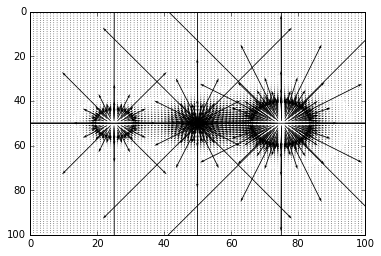

In [17]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
resolution = 100 #resolution of 1m by 1m grid 
field=np.zeros((resolution,resolution)) #create fields arrays
fieldx=np.zeros((resolution,resolution))
fieldy=np.zeros((resolution,resolution))

def distanceFrom(point1,point2): #fuction to find relationship between two points 
    distance = np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    #print distance
    if point1[1]-point2[1] == 0 and point1[0]-point2[0] == 0: #if the points arent on top of eachother (error handeling)
        return 0,0 #return zeros
    elif point1[0]-point2[0] == 0: #if on y axis relative to center point
        if point1[1]-point2[1] > 0: #if above center point
            return point1[1]-point2[1], 90
        elif point1[1]-point2[1] < 0: #below center point
            return abs(point1[1]-point2[1]), 270
    elif point1[1]-point2[1] == 0: #if on the x axis
        if point1[0]-point2[0] > 0: #if left of center point
            return point1[0]-point2[0], 180
        elif point1[0]-point2[0] < 0: #below center point 
            return abs(point1[0]-point2[0]),0
    else:
        angle = np.arctan(float(abs(point1[1]-point2[1]))/abs(point1[0]-point2[0])) #find reference angle
        #print "({0},{1})".format(point1[0]-point2[0],point1[1]-point2[1]) #y
        if point1[0]-point2[0] == 0: #flush if on point
            quad = 0
        elif point1[0]-point2[0] < 0: #quadrants 1 and 4
            if point1[1]-point2[1] == 0:#on y axis
                quad = 0
            elif point1[1]-point2[1] > 0: #qaudrants 1 and 2 so becomes 1
                quad = 1
                angle = angle #angle is reference angle
            elif point1[1]-point2[1] < 0: #quadrants 3 and 4
                quad = 4
                #print angle
                angle = (2.0*np.pi) - angle #ajust for q4
                #print angle
        elif point1[0]-point2[0] > 0: #quadrants 2 and 3
            if point1[1]-point2[1] == 0:#on y axis
                quad = 0
            elif point1[1]-point2[1] > 0: #qaudrants 1 and 2 so becomes 2
                quad = 2
                angle = np.pi-angle #ajust for quadrant 2
            elif point1[1]-point2[1] < 0: #quadrants 3 and 4
                quad = 3
                angle = np.pi+angle #ajust for q3

        #distance = distance * (1/resolution) #convert to meters
        #print distance
#         plt.figure()
#         plt.xlim(0,10)
#         plt.ylim(0,10)
#         plt.gca().invert_yaxis()
#         plt.plot(point2[0],point2[1],'or')
#         plt.plot(point1[0],point1[1],'og')
#         plt.show()
        return distance,np.rad2deg(angle)#, quad
    
def addCharge(magnitude=5, location=(0,0)):
    k=9.11e9
    field[location[1]][location[0]] = magnitude
    for x in range(0,len(field)):
        for y in range(0,len(field)): #find y vector values
            dist, angle = distanceFrom(location,(x,y))
            if dist != 0:
                eFieldConst = (k*magnitude/((dist*1.0/resolution)**2))
            else:
                eFieldConst = 0
            fieldx[y,x] = fieldx[y,x] + np.cos(np.deg2rad(angle)) * eFieldConst
            fieldy[y,x] = fieldy[y,x] + np.sin(np.deg2rad(angle)) *eFieldConst
            field[y,x] = field[y,x] + eFieldConst
            #print "T.P=({0},{1}) | Angle={2} | Dist={3} | X comp={4} | Y comp={5} |".format(x,y,angle,dist,fieldx[x,y],fieldy[x,y])
            

#distanceFrom((0,0),(999,0))
addCharge(0.0000001,(25,50))
addCharge(-0.0000002,(50,50))
addCharge(0.0000003,(75,50))
fieldx[24,40]= 0
#addCharge(3,(2,2))

#addCharge(2,(2,1))
#print field


#plt.imshow(field, interpolation='nearest')
plt.gca().invert_yaxis()
a = plt.quiver(fieldx,fieldy)
#plt.imshow(field)
#plt.show()

In [ ]:
####### IGNORE FOR PROGRAM - JUST TESTING FOR FINAL ######### (IN IPYTHON NOTEBOOK)
def distanceFrom(point1,point2):
    distance = np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
    #print distance
    if point1[1]-point2[1] == 0 and point1[0]-point2[0] == 0: #if the points arent on top of eachother (error handeling)
        return 0,0 #return zeros
    elif point1[0]-point2[0] == 0: #if on y axis relative to center point
        if point1[1]-point2[1] > 0: #if above center point
            return point1[1]-point2[1], 90
        elif point1[1]-point2[1] < 0: #below center point
            return abs(point1[1]-point2[1]), 270
    elif point1[1]-point2[1] == 0: #if on the x axis
        if point1[0]-point2[0] > 0: #if left of center point
            return point1[0]-point2[0], 180
        elif point1[0]-point2[0] < 0: #below center point 
            return abs(point1[0]-point2[0]),0
    else:
        angle = np.arctan(float(abs(point1[1]-point2[1]))/abs(point1[0]-point2[0])) #find reference angle
        #print "({0},{1})".format(point1[0]-point2[0],point1[1]-point2[1]) #y
        if point1[0]-point2[0] == 0: #flush if on point
            quad = 0
        elif point1[0]-point2[0] < 0: #quadrants 1 and 4
            if point1[1]-point2[1] == 0:#on y axis
                quad = 0
            elif point1[1]-point2[1] > 0: #qaudrants 1 and 2 so becomes 1
                quad = 1
                angle = angle #angle is reference angle
            elif point1[1]-point2[1] < 0: #quadrants 3 and 4
                quad = 4
                #print angle
                angle = (2.0*np.pi) - angle #ajust for q4
                #print angle
        elif point1[0]-point2[0] > 0: #quadrants 2 and 3
            if point1[1]-point2[1] == 0:#on y axis
                quad = 0
            elif point1[1]-point2[1] > 0: #qaudrants 1 and 2 so becomes 2
                quad = 2
                angle = np.pi-angle #ajust for quadrant 2
            elif point1[1]-point2[1] < 0: #quadrants 3 and 4
                quad = 3
                angle = np.pi+angle #ajust for q3

        #distance = distance * (1/resolution) #convert to meters
        #print distance
        plt.figure()
        plt.xlim(0,10)
        plt.ylim(0,10)
        plt.gca().invert_yaxis()
        plt.plot(point2[0],point2[1],'or')
        plt.plot(point1[0],point1[1],'og')
        plt.show()
        return distance,np.rad2deg(angle)#, quad
        
    
print distanceFrom((2,5),(9,0))

